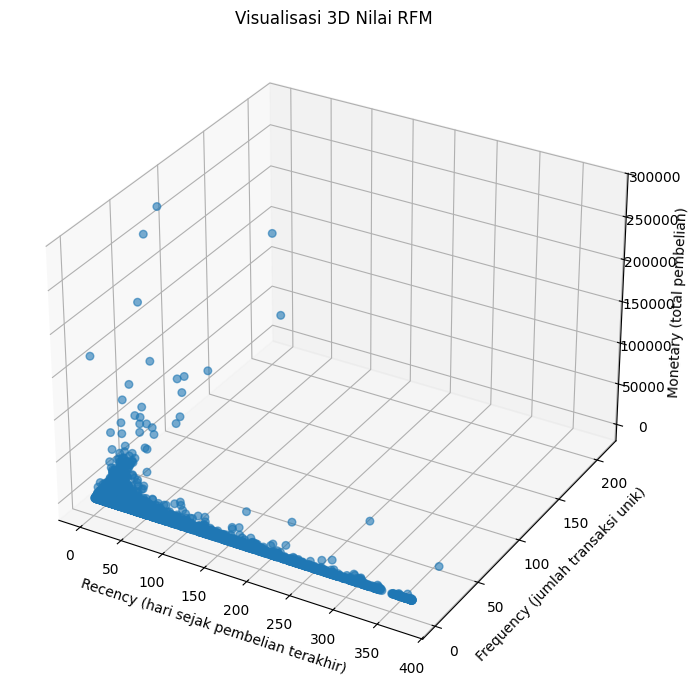

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_excel("..\data\Online Retail.xlsx")

# Bersihkan data
df.dropna(subset=['CustomerID'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Tanggal referensi
now = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]  # Hapus yang tidak ada pembelian

# Visualisasi 3D RFM
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], s=30, alpha=0.6)

# Label dan judul
ax.set_xlabel('Recency (hari sejak pembelian terakhir)')
ax.set_ylabel('Frequency (jumlah transaksi unik)')
ax.set_zlabel('Monetary (total pembelian)')
ax.set_title('Visualisasi 3D Nilai RFM')

plt.tight_layout()
plt.show()


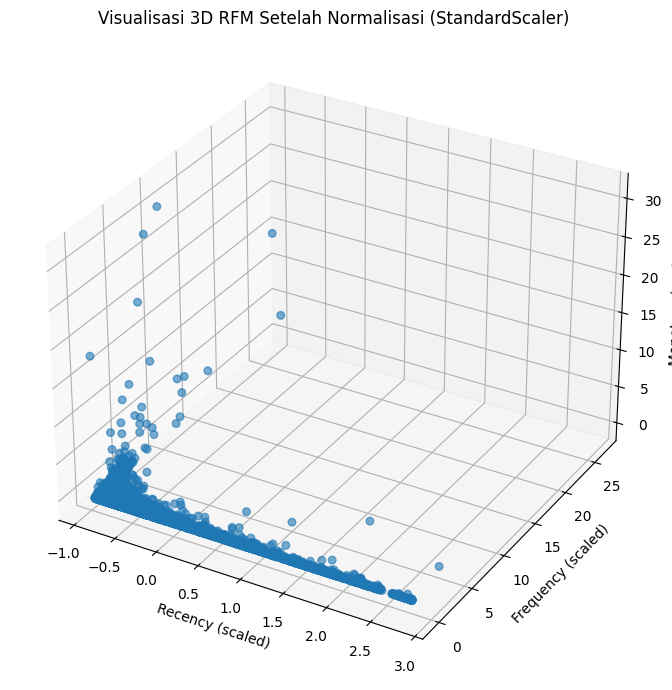

In [6]:
# Normalisasi
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=['Recency', 'Frequency', 'Monetary'])

# Visualisasi 3D setelah normalisasi
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_scaled_df['Recency'], rfm_scaled_df['Frequency'], rfm_scaled_df['Monetary'], s=30, alpha=0.6)

# Label dan judul
ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('Visualisasi 3D RFM Setelah Normalisasi (StandardScaler)')

plt.tight_layout()
plt.show()